In [1]:
import numpy as np
import matplotlib.pyplot as plt
#np.set_printoptions(threshold=np.inf)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
r_wp = np.logspace(-1, 1.5, 15)
r_wp = (r_wp[:-1]+r_wp[1:])/2.
print r_wp
r_vpf = np.logspace(0,1.3,15)[:-2]
print r_vpf

[  0.12542954   0.18922183   0.2854583    0.43063973   0.6496591
   0.98006969   1.47852402   2.2304876    3.36489287   5.07624612
   7.65797774  11.55275406  17.42837743  26.29228826]
[  1.           1.23838916   1.53360772   1.89920318   2.35195264
   2.91263265   3.60697272   4.46683592   5.5316812    6.85037405
   8.48342898  10.50578652  13.01025217]


In [3]:
zeropoint = np.load('121117_ngalwpvpf_Fisher_zp.npz')

In [4]:
zeropoint.files

['func_all', 'param', 'func_all_cov']

In [5]:
func_zp = zeropoint['func_all'][:,:-2]
funccov_zp = zeropoint['func_all_cov'][:,:-2,:-2]
param_zp = zeropoint['param']

In [6]:
param_median = param_zp[0]
param_median

array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])


Out[4]:
array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])

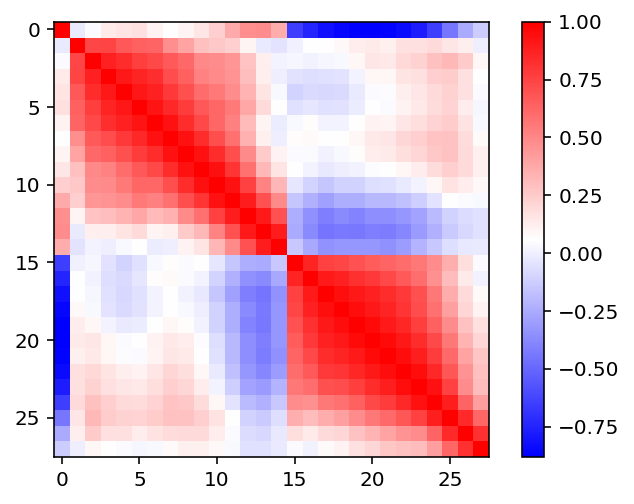

In [7]:
plt.imshow((funccov_zp[0]/np.sqrt(funccov_zp[0].diagonal())).T/np.sqrt(funccov_zp[0].diagonal()),cmap='bwr')
plt.colorbar()

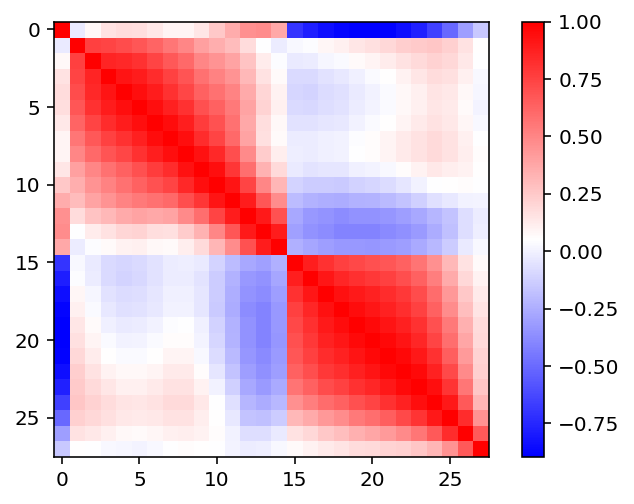

In [8]:
plt.imshow((np.mean(funccov_zp,axis=0)/np.sqrt(np.mean(funccov_zp,axis=0).diagonal())).T\
           /np.sqrt(np.mean(funccov_zp,axis=0).diagonal()),cmap='bwr')
plt.colorbar()

In [9]:
covar_real = np.cov(func_zp.T)

covar_cosmic = np.mean(funccov_zp,axis=0)

covar_tot = covar_cosmic+covar_real

In [10]:
pert = np.load('121217_ngalwpvpf_Fisher.npz')

In [11]:
pert.files

['i', 'func_all', 'param']

In [12]:
func = pert['func_all'][:,:-2]
param = pert['param']
ip = pert['i']

In [13]:
dfdp = np.zeros((7,28))

def dfdpi(i_p,i_f):
    return np.linalg.lstsq((param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p])[:,np.newaxis],\
                           func[1000*i_p:1000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0))[0]

In [14]:
for i in range(7):
    for j in range(28):
        dfdp[i,j] = dfdpi(i,j)

In [15]:
def plot_dfdp(i_p,i_f):
    plt.plot(param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p],func[1000*i_p:1000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0),'.')
    plt.xlabel('dp'+str(i_p))
    plt.ylabel('df'+str(i_f))
    plt.axhline(0,c='k',linestyle='--')
    plt.axvline(0,c='k',linestyle='--')
    plt.plot(np.array((min(param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p]))),\
             np.array((min(param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[1000*i_p:1000*(i_p+1),i_p]-param_median[i_p])))*dfdp[i_p,i_f])

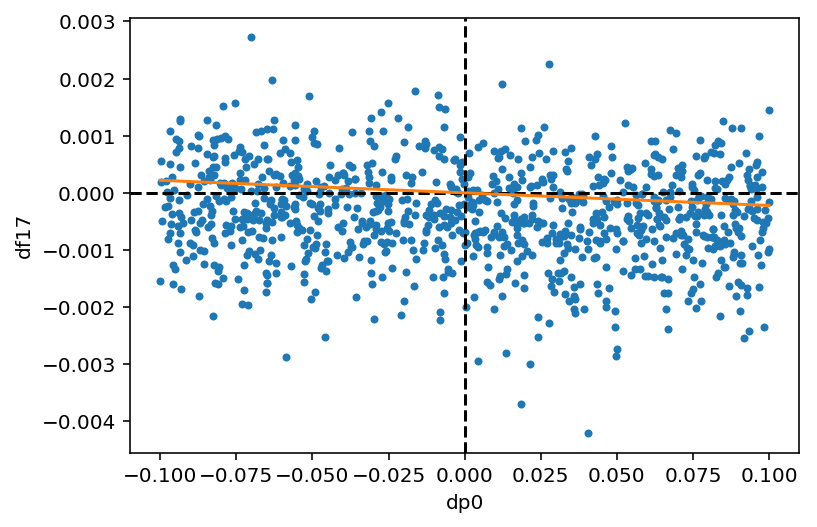

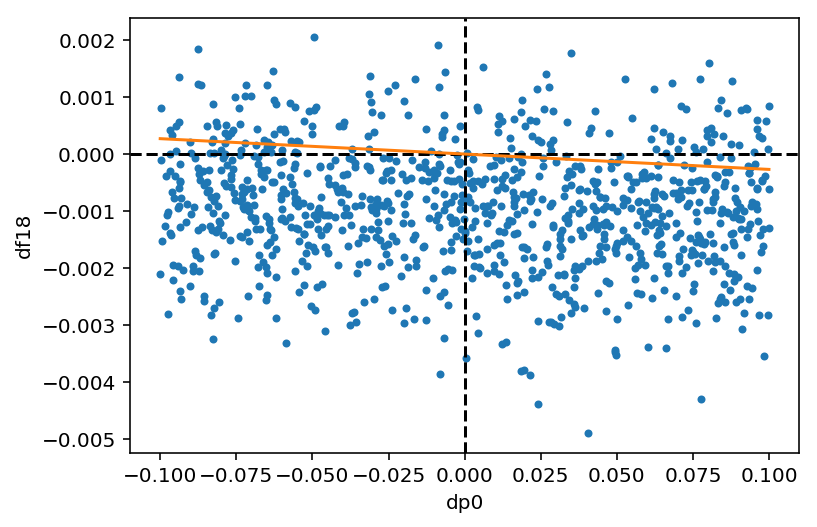

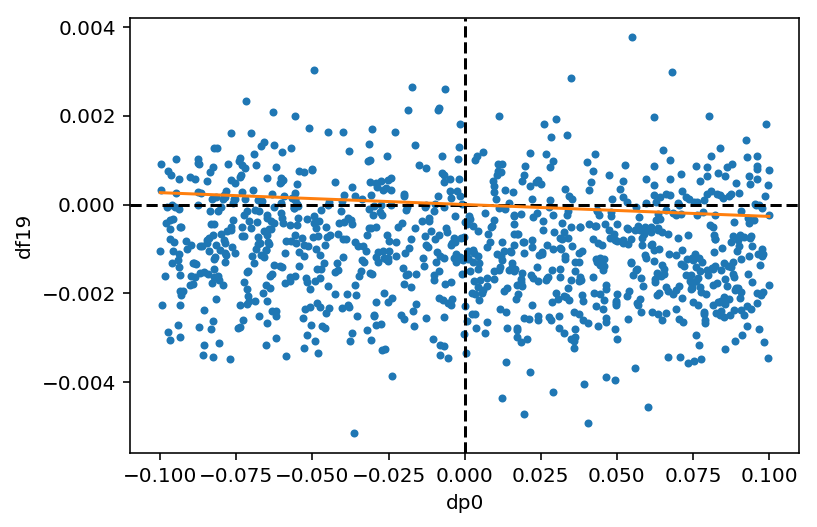

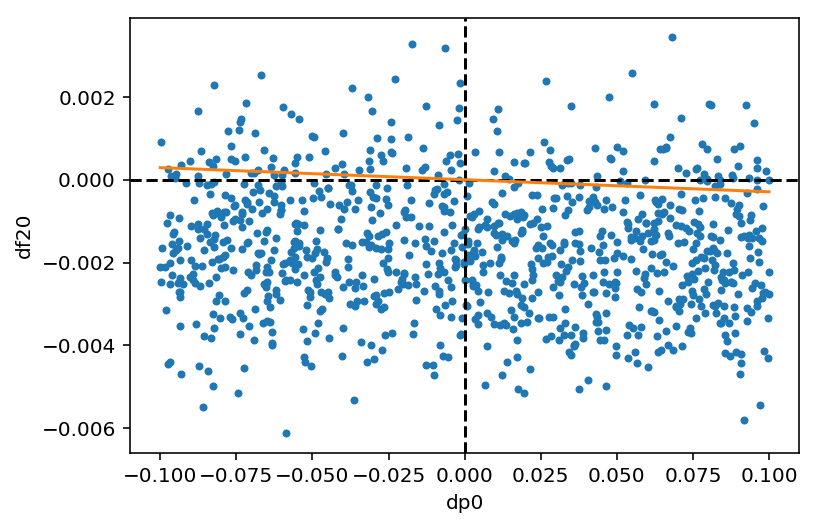

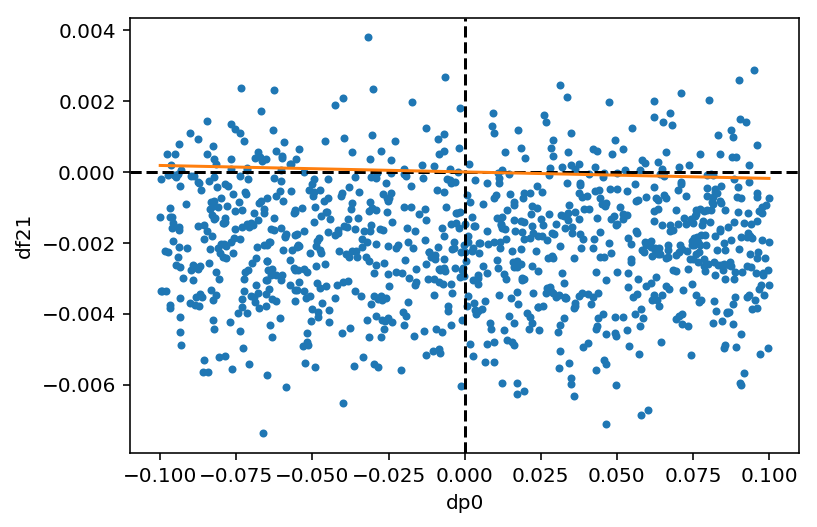

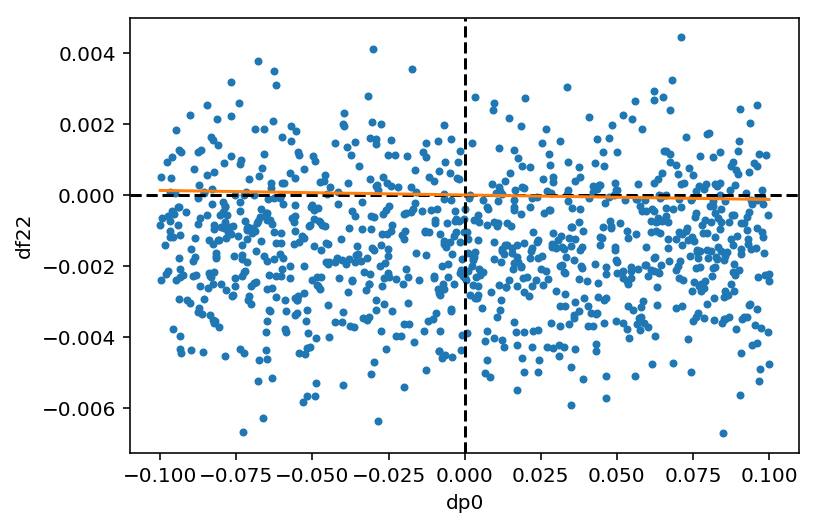

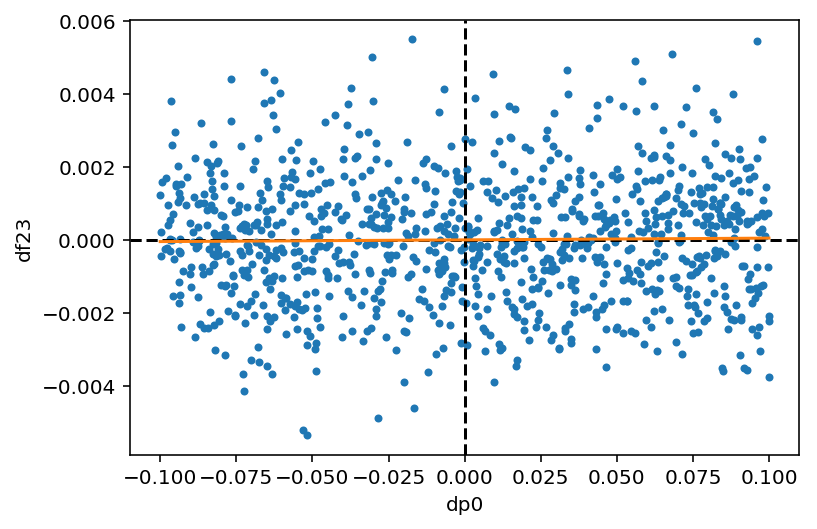

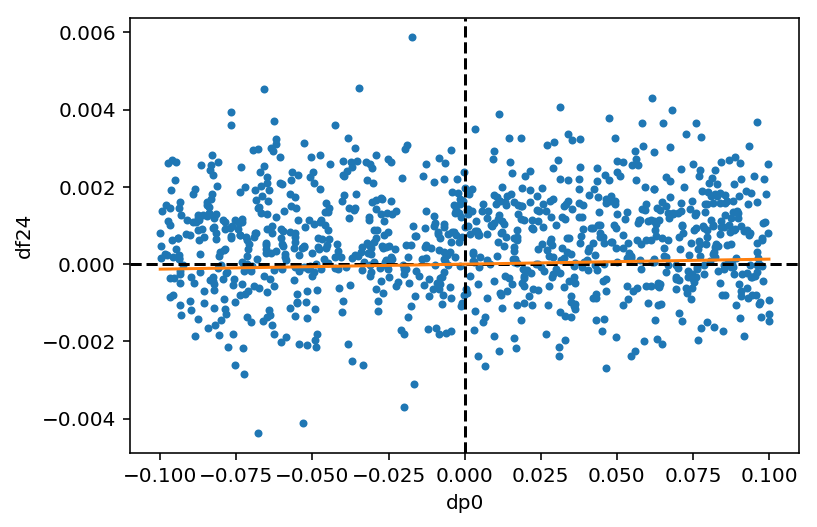

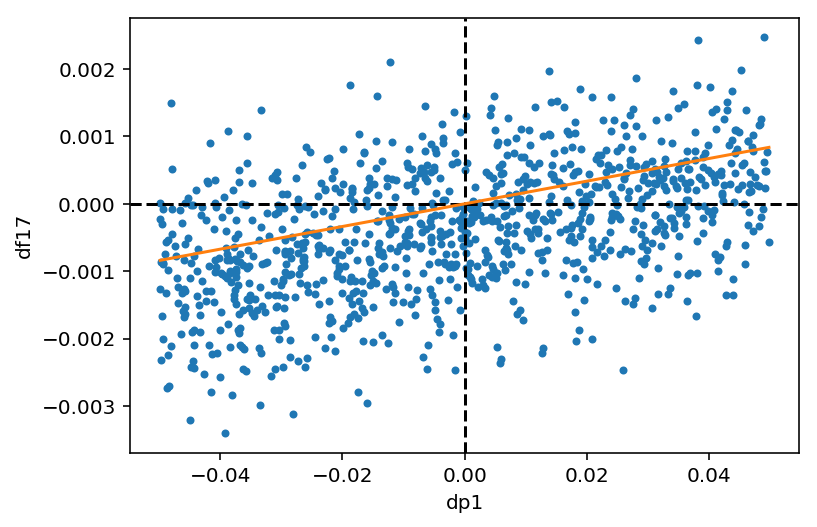

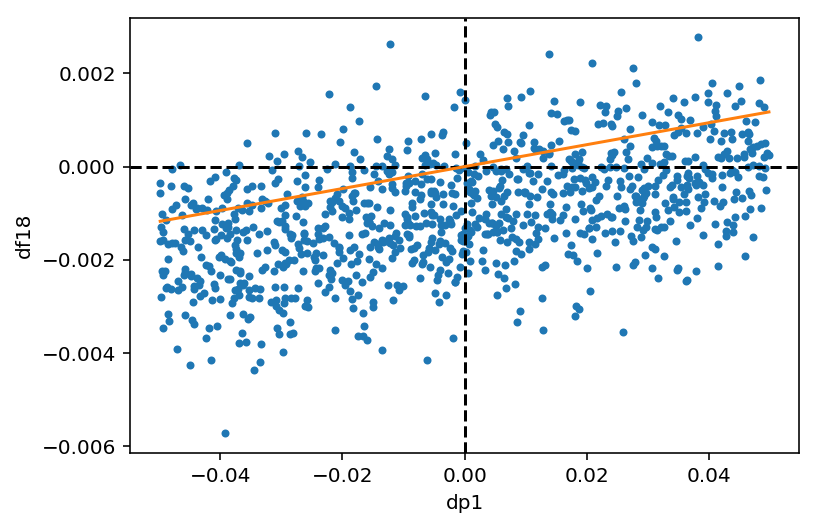

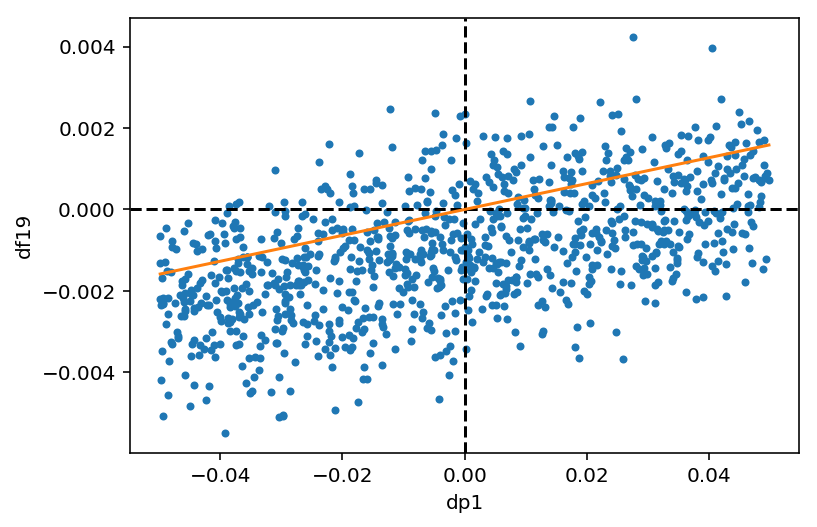

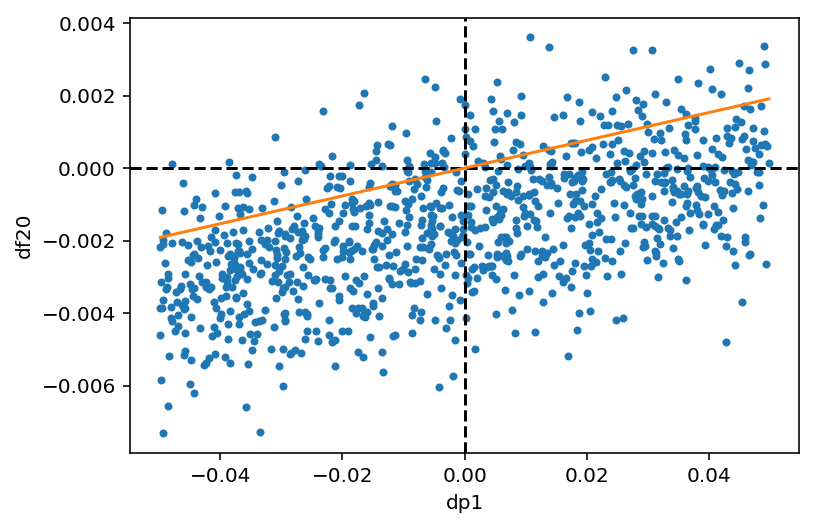

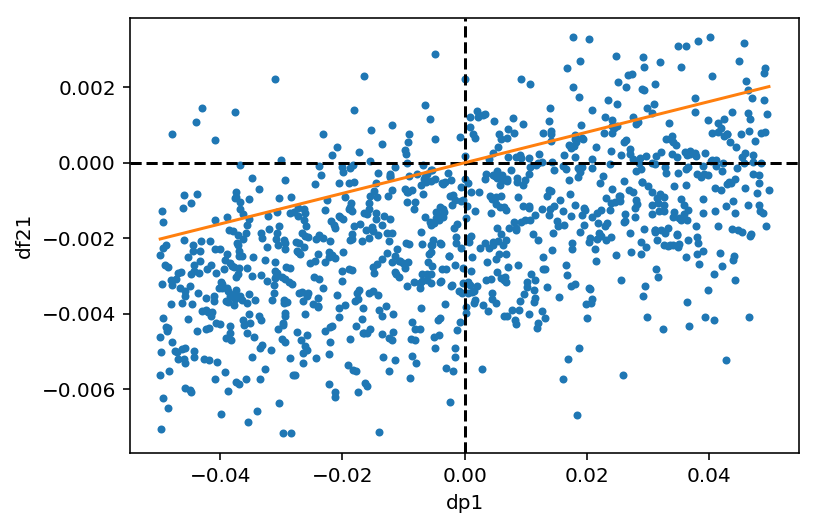

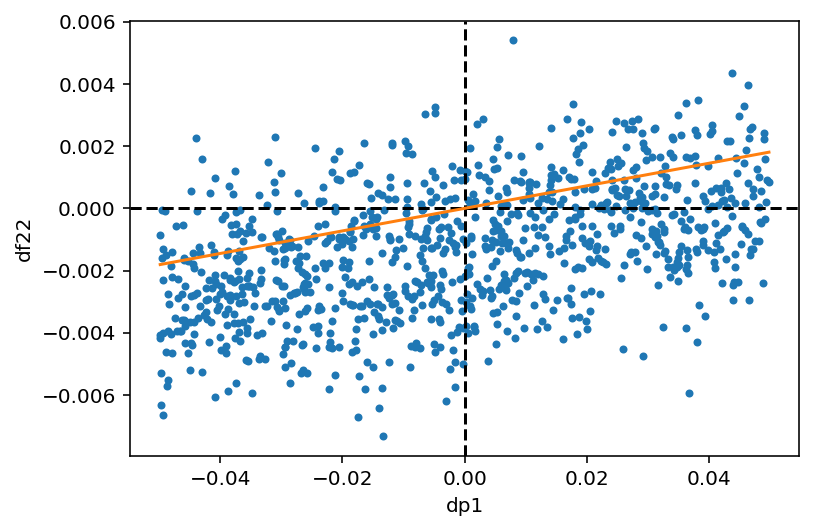

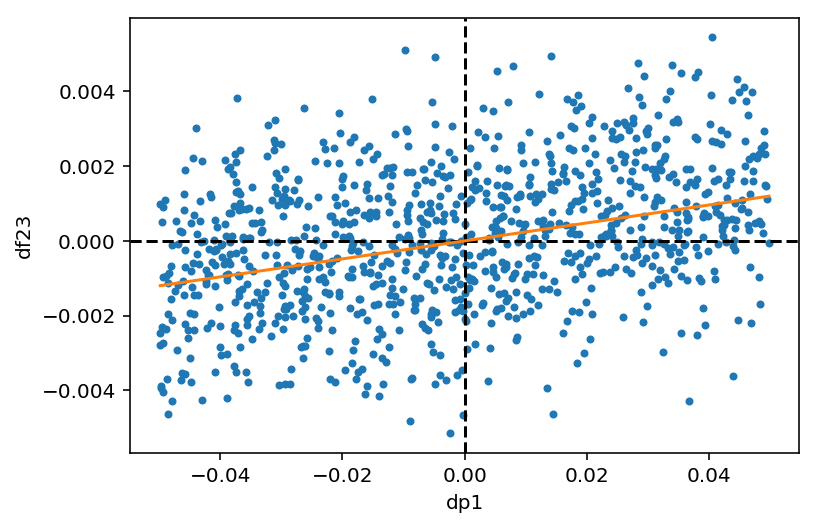

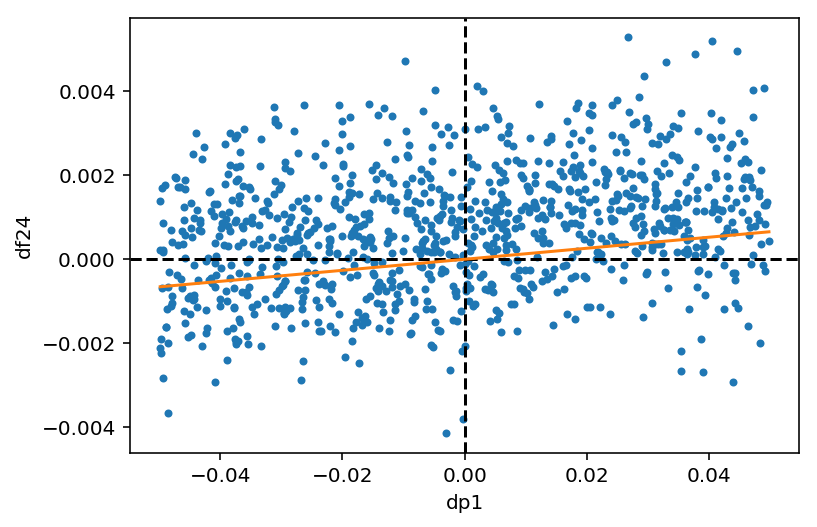

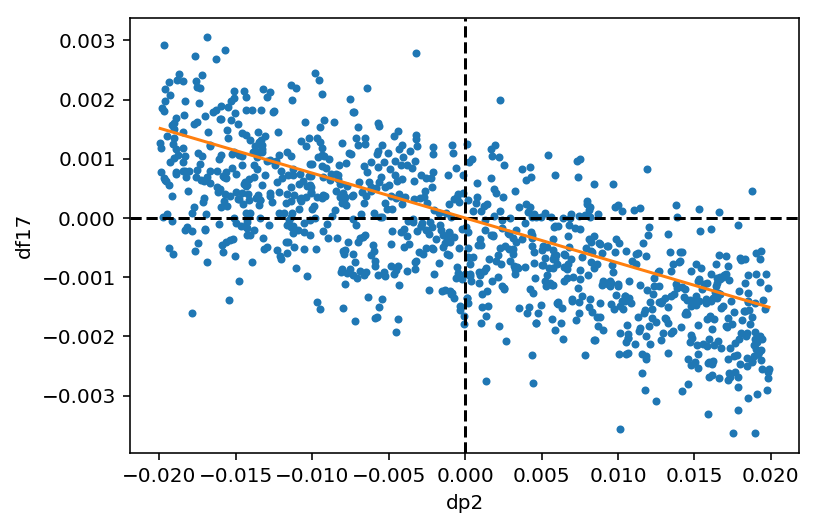

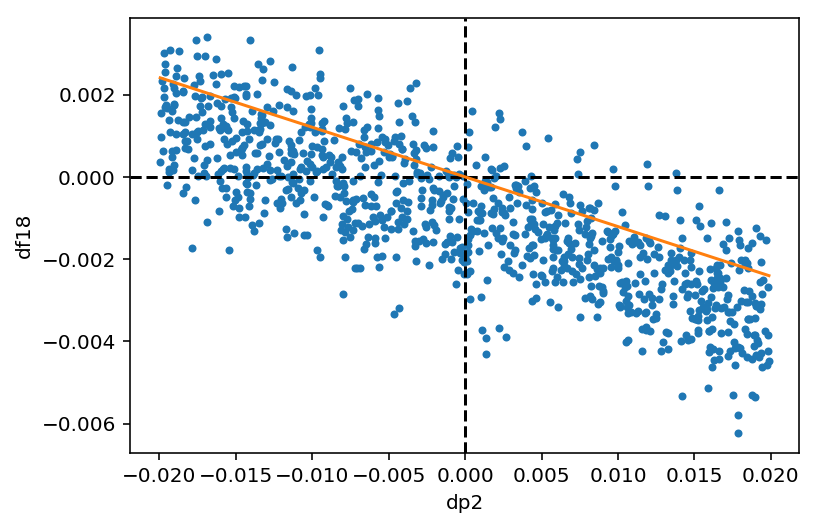

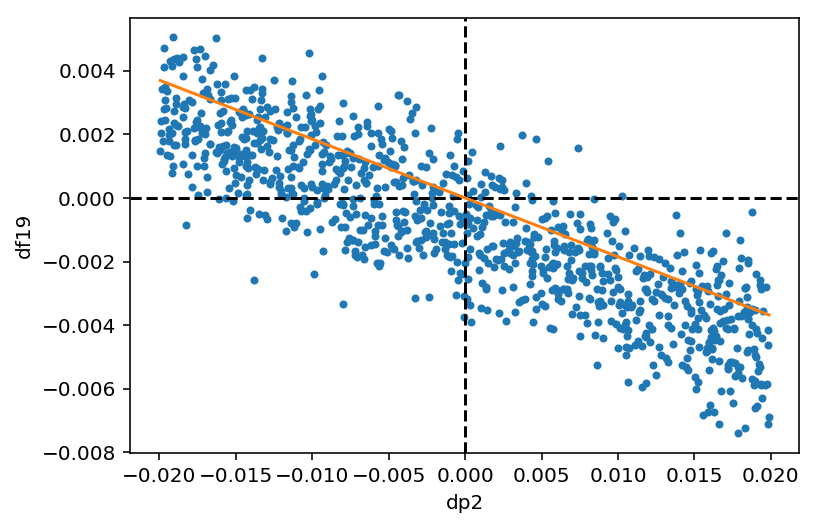

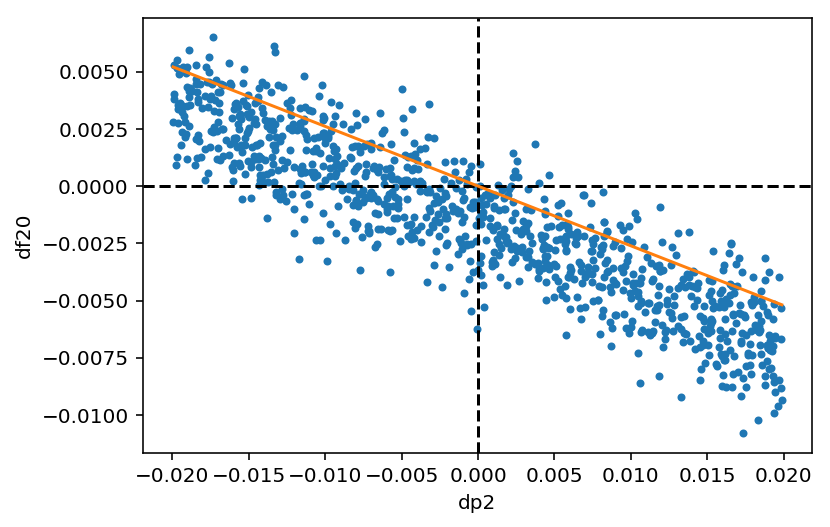

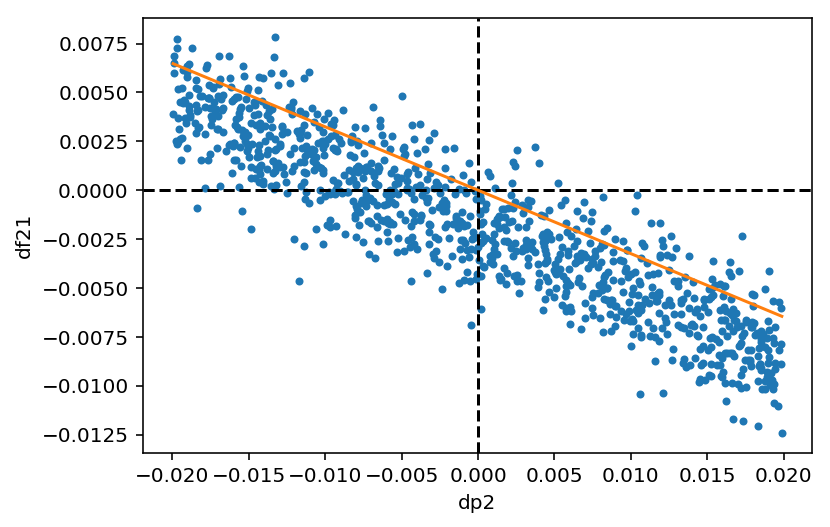

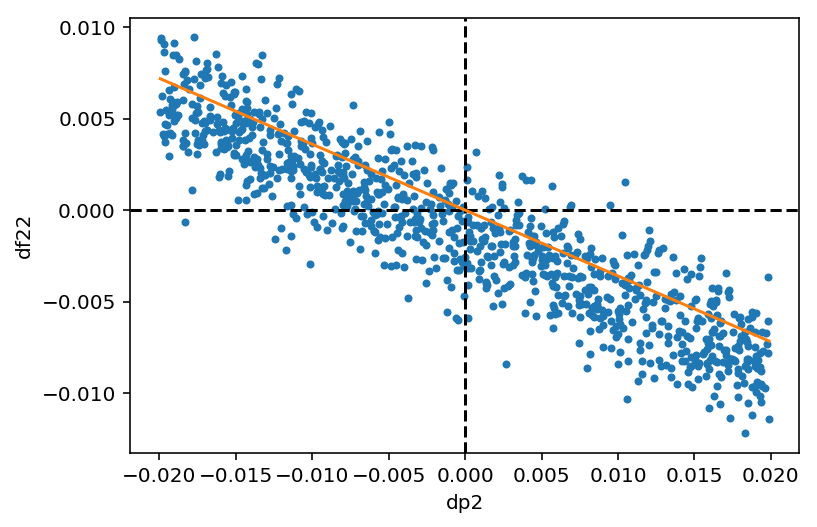

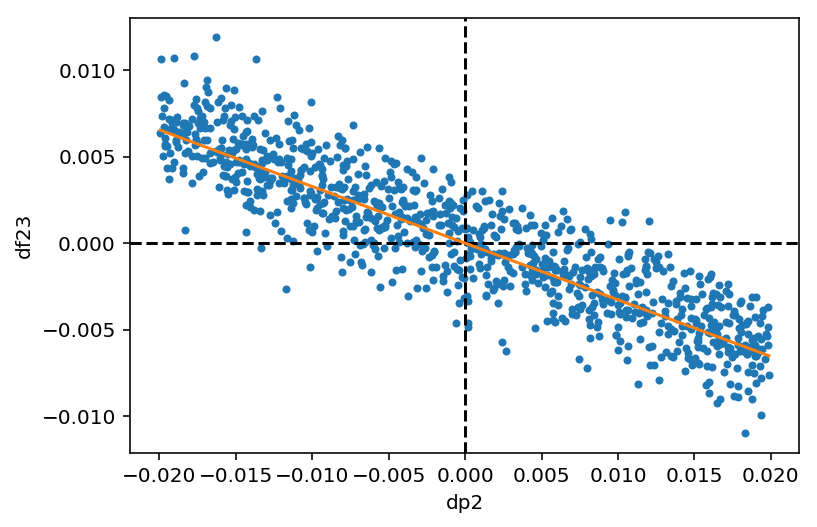

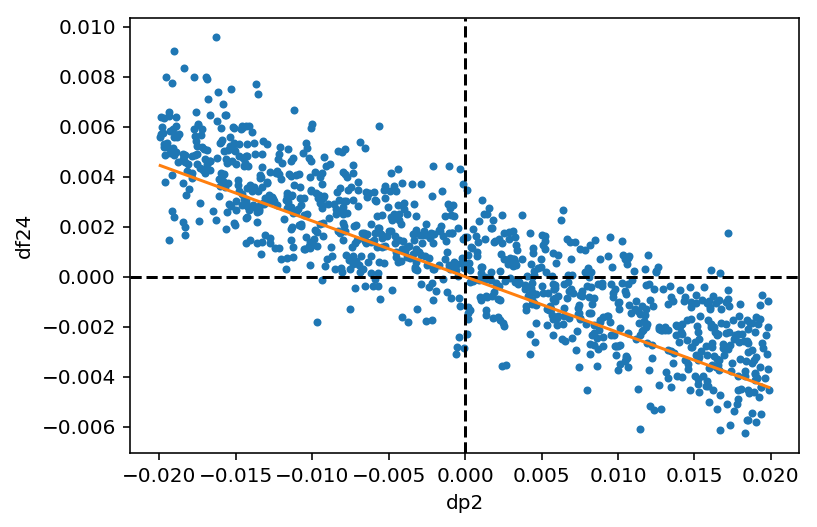

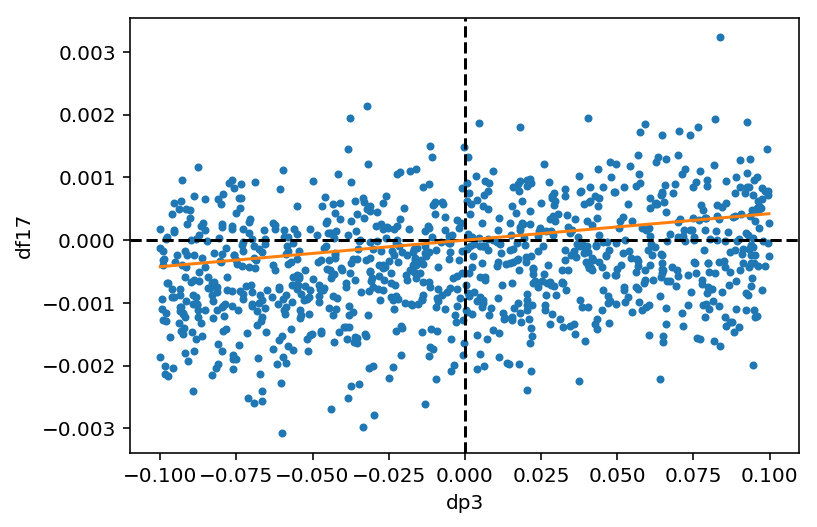

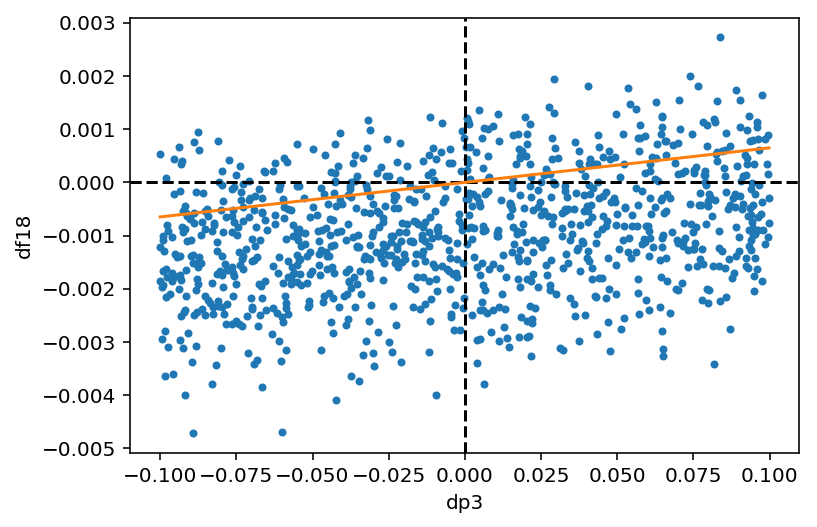

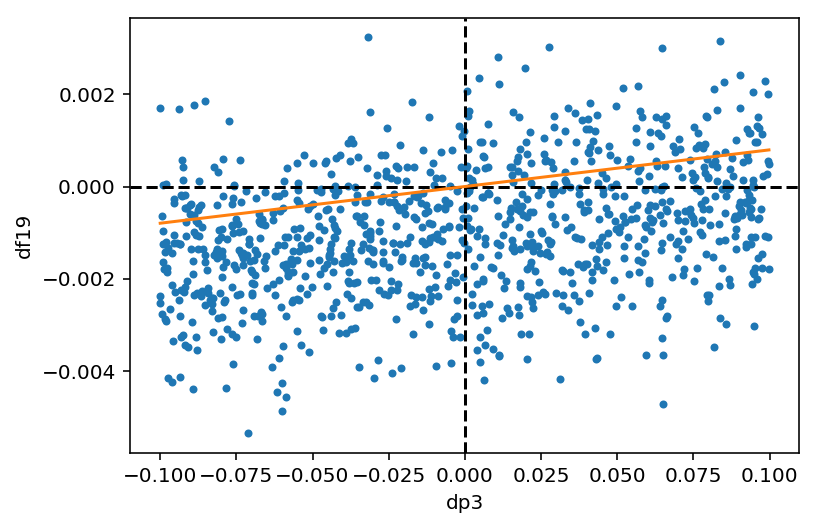

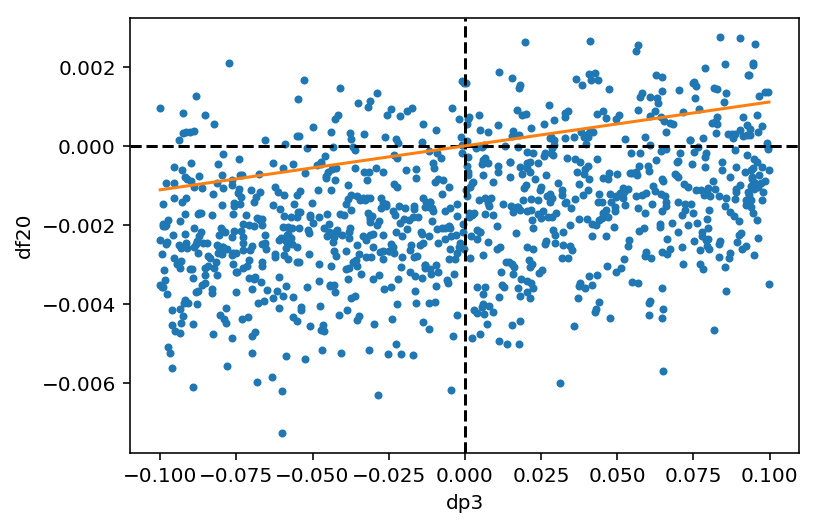

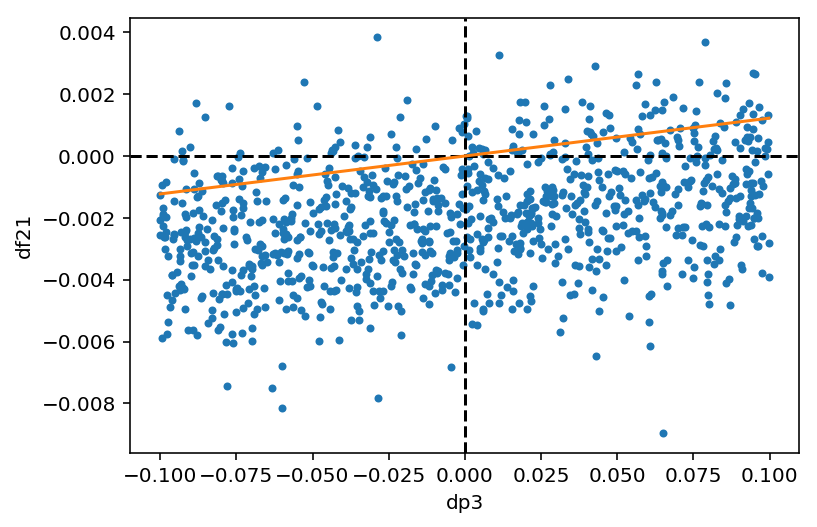

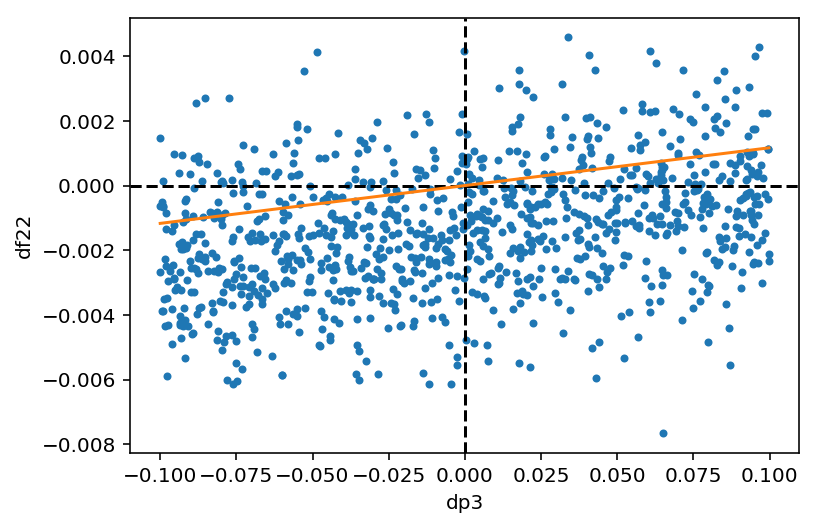

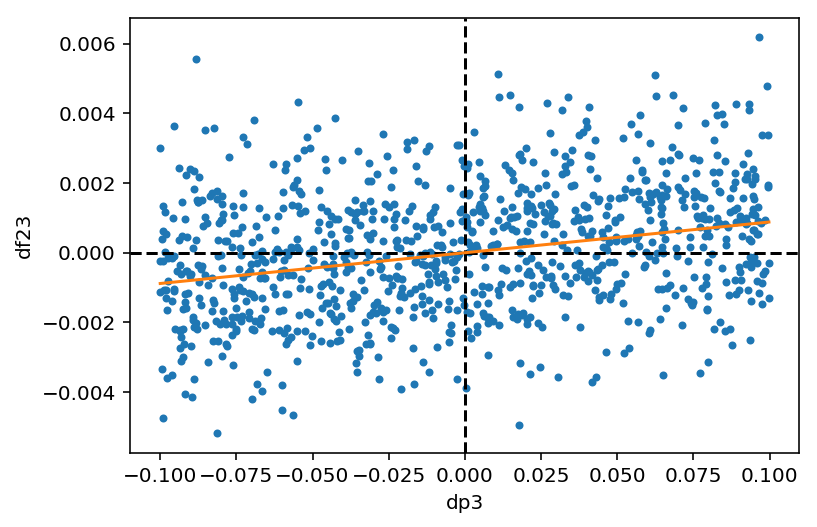

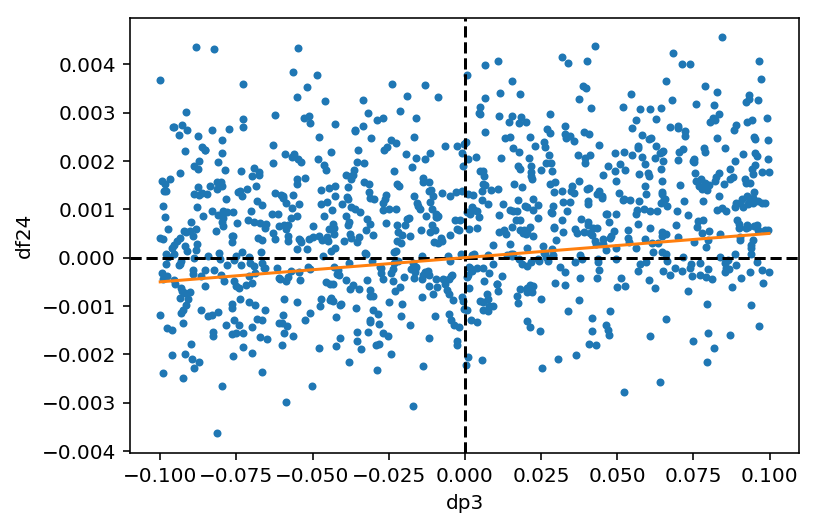

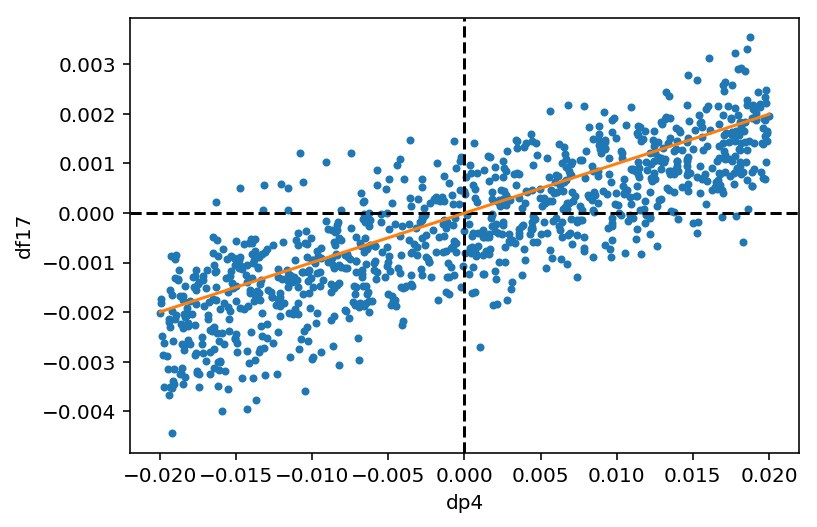

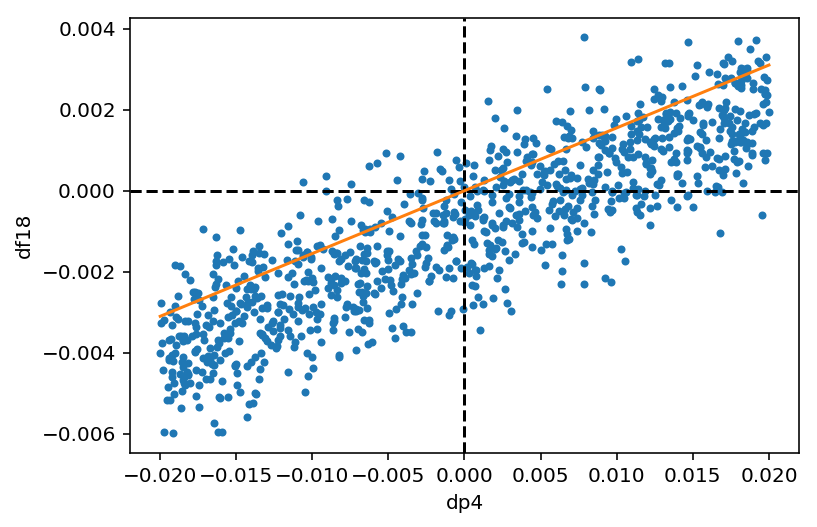

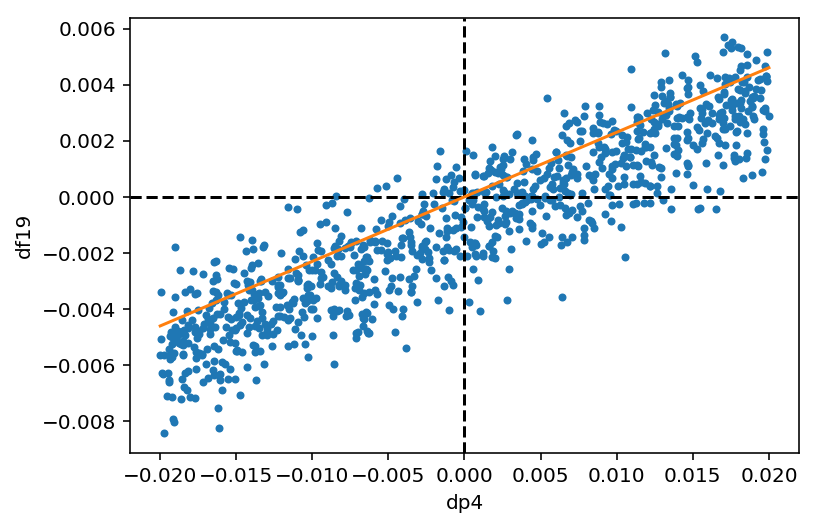

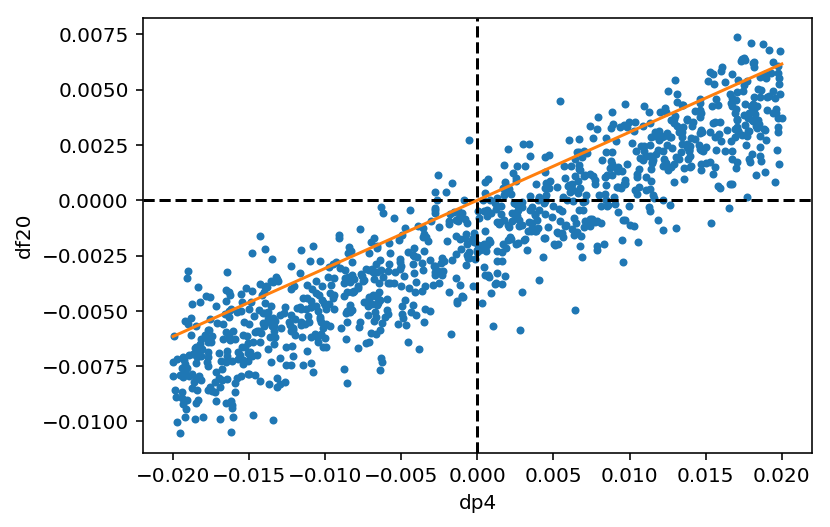

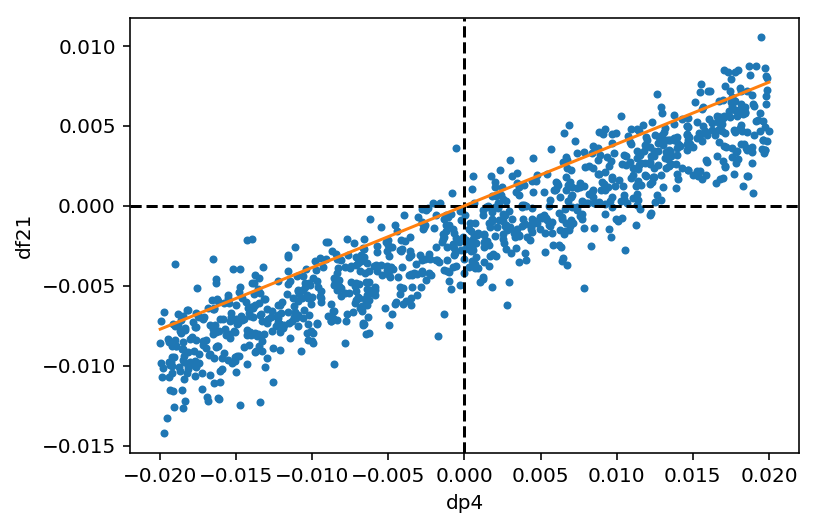

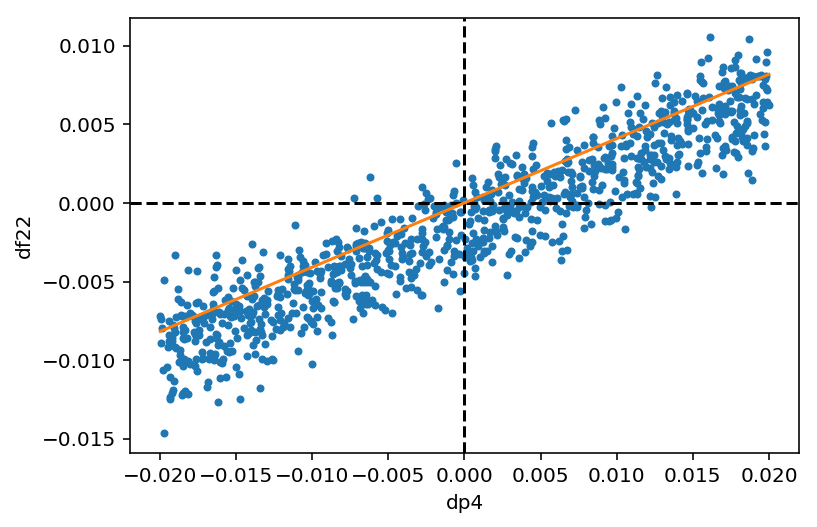

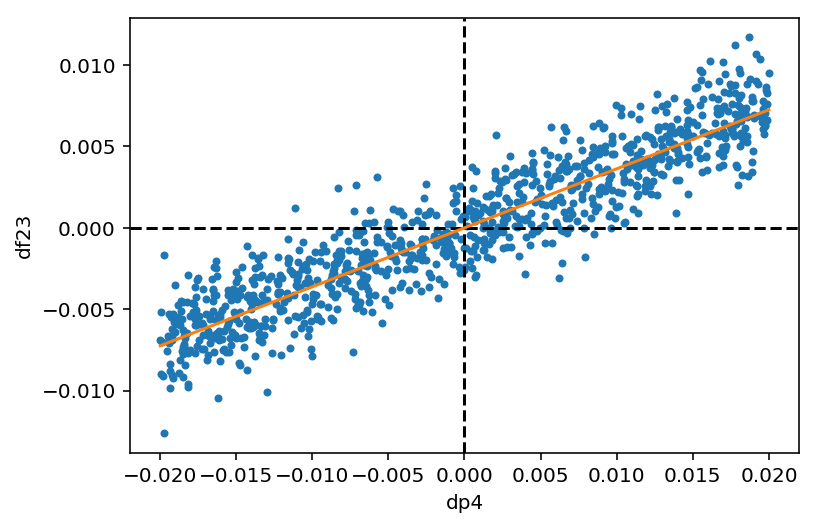

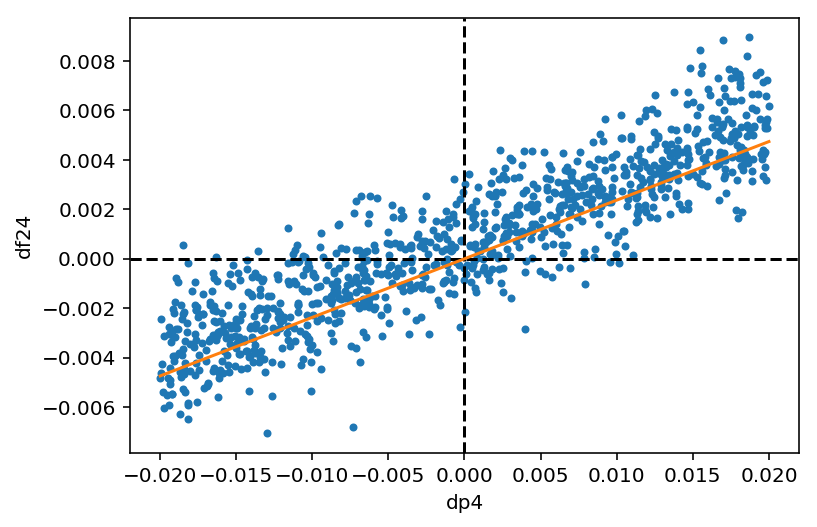

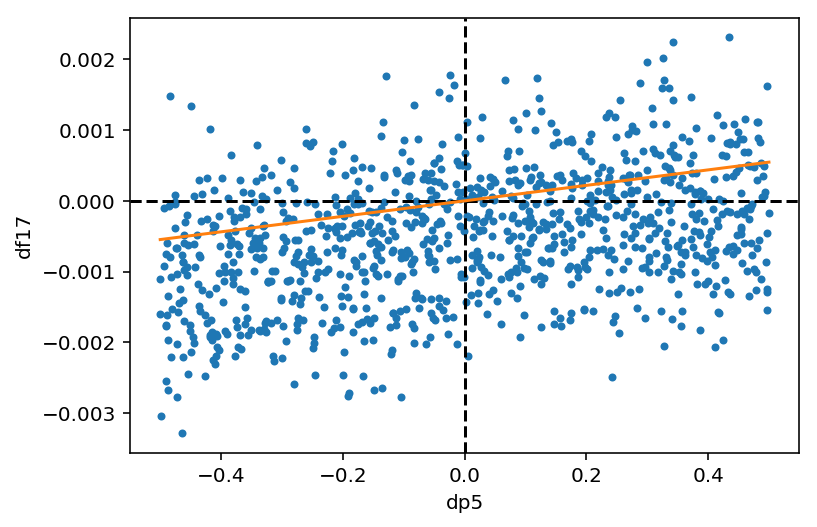

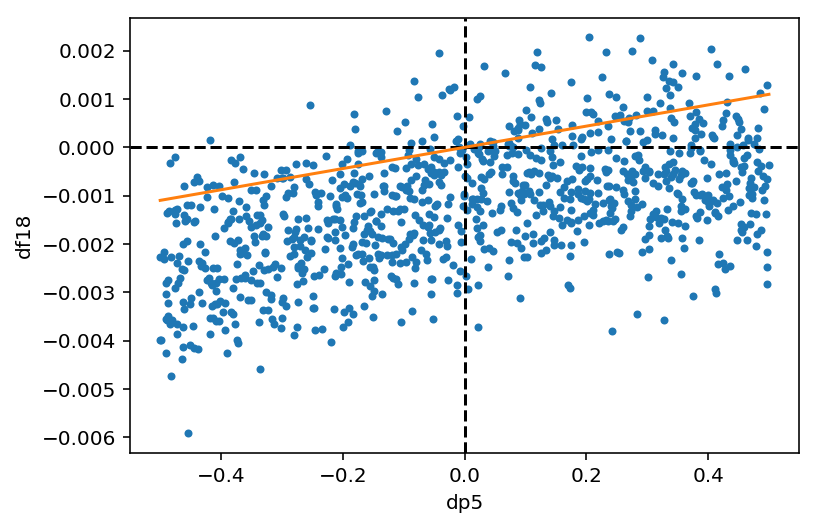

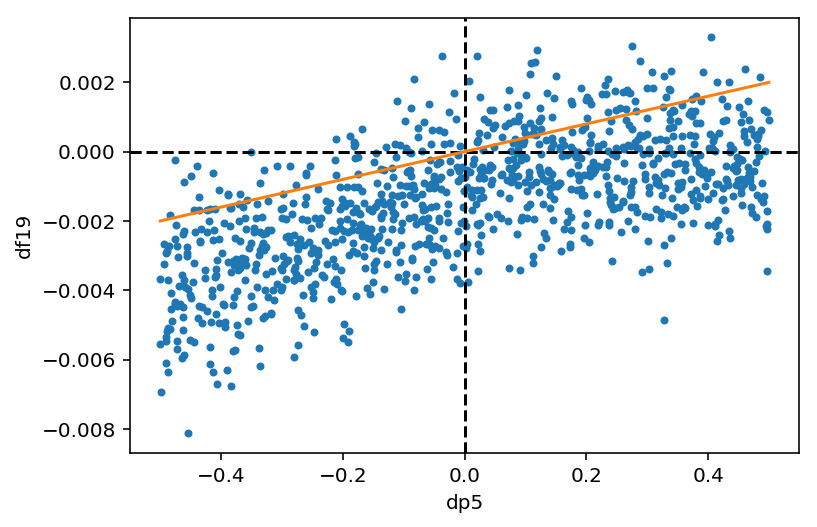

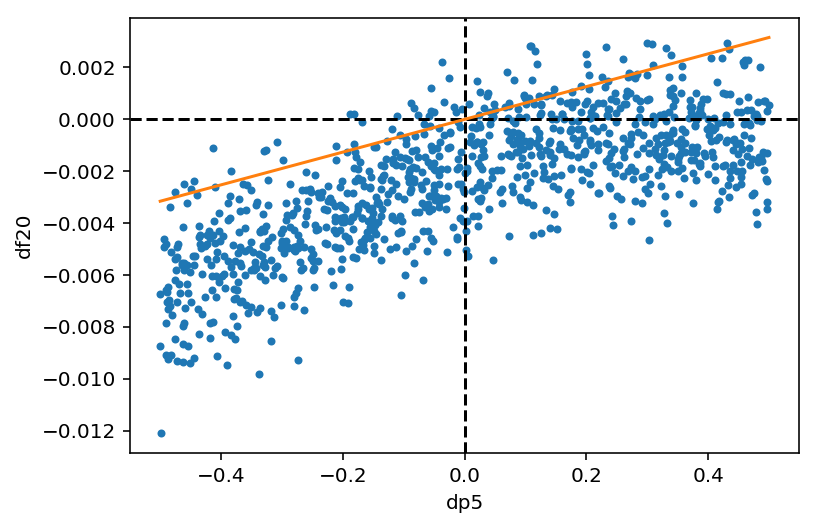

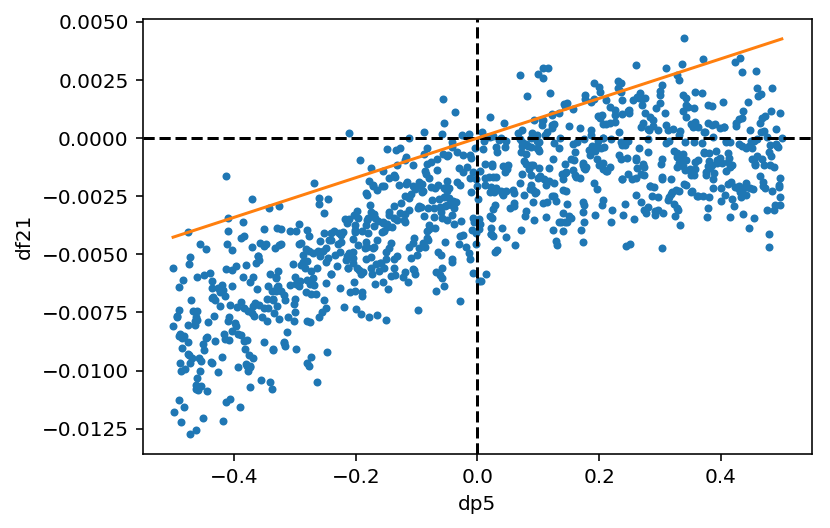

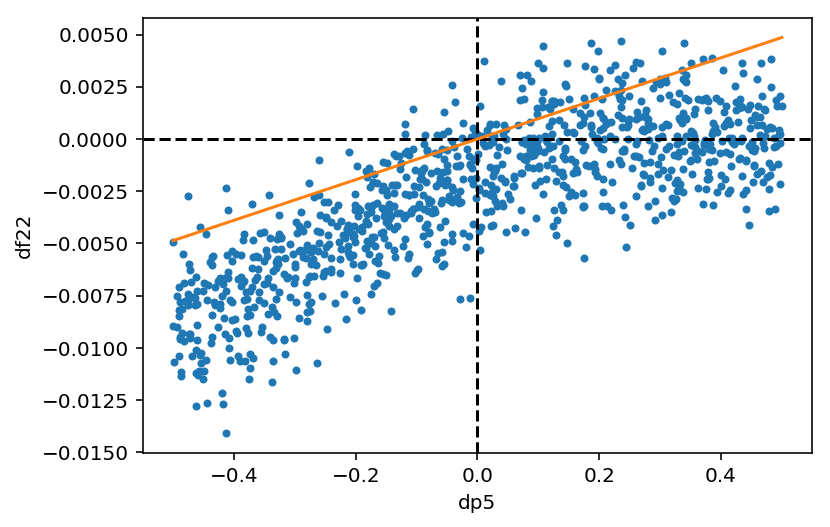

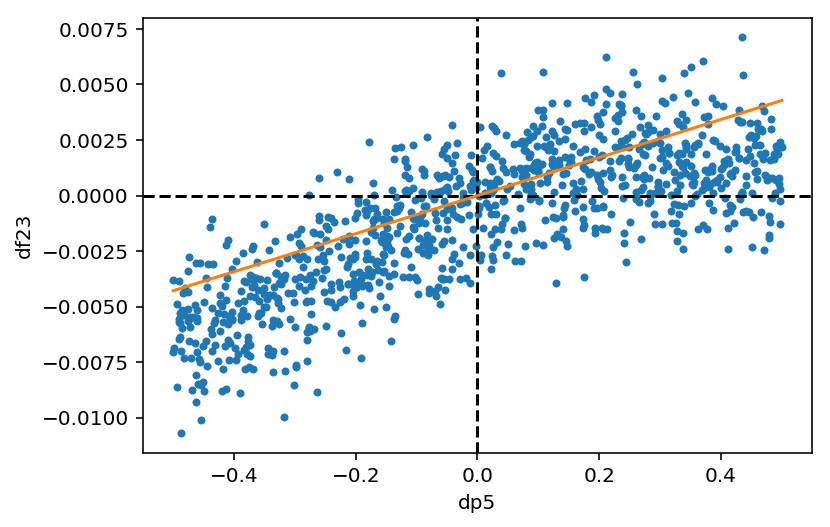

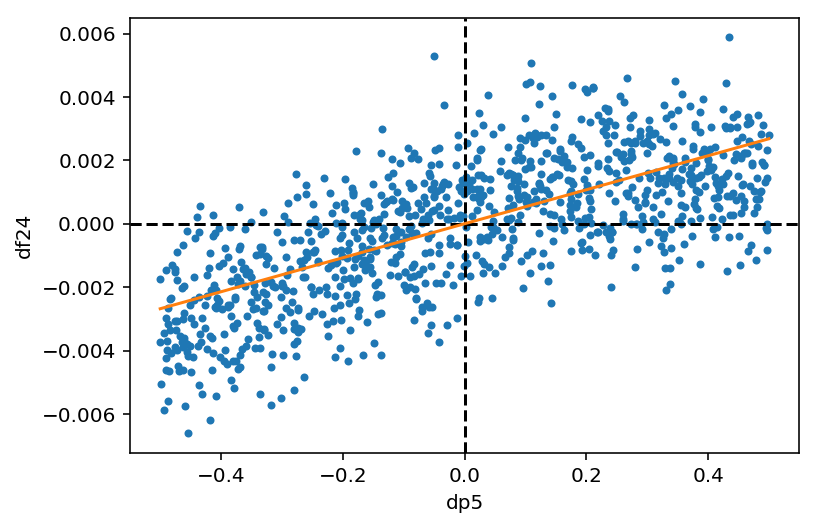

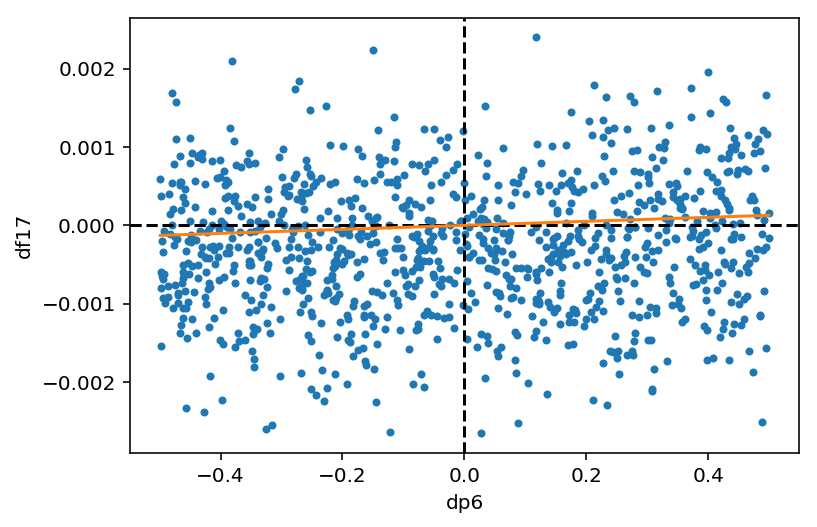

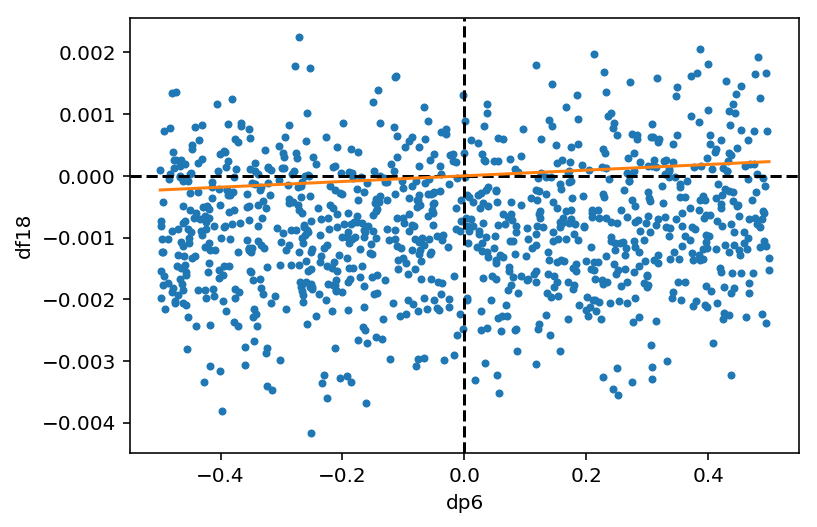

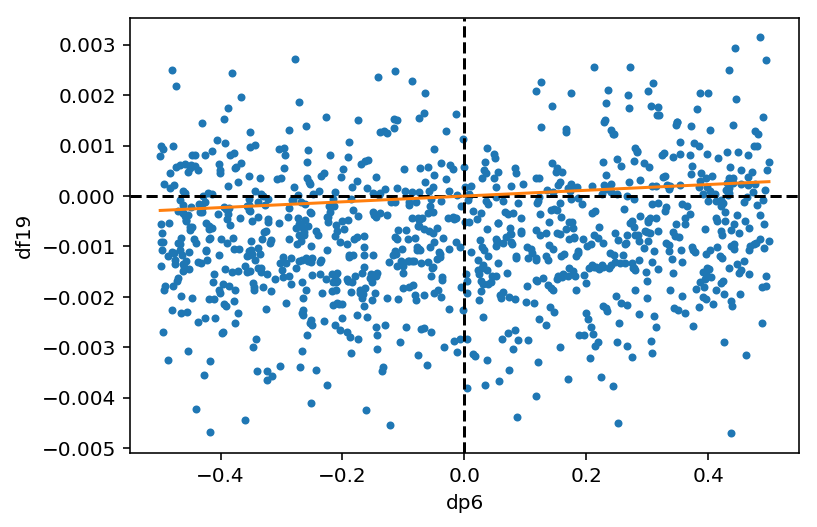

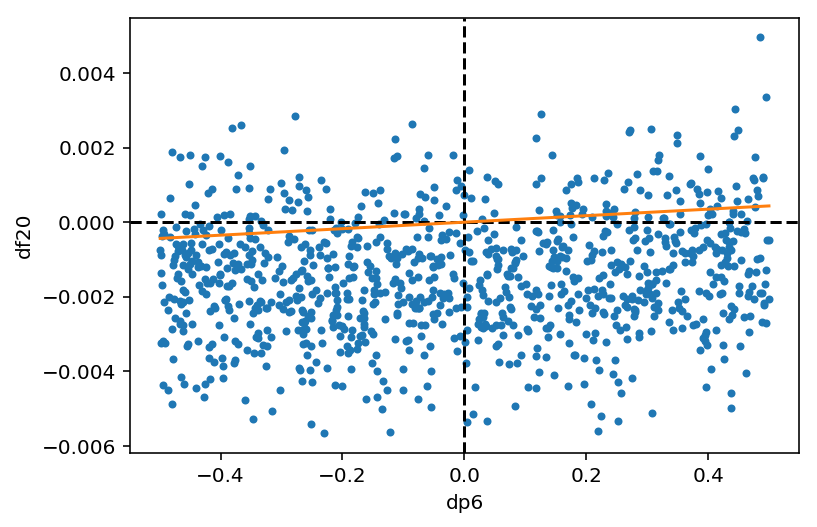

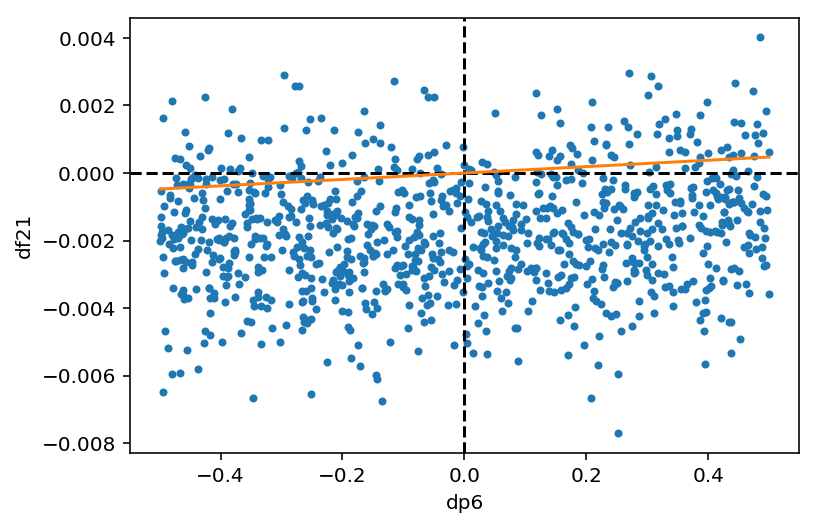

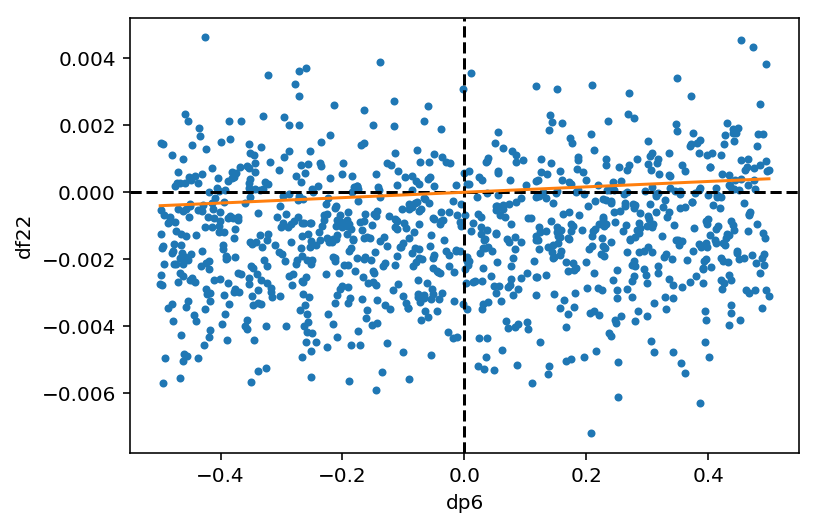

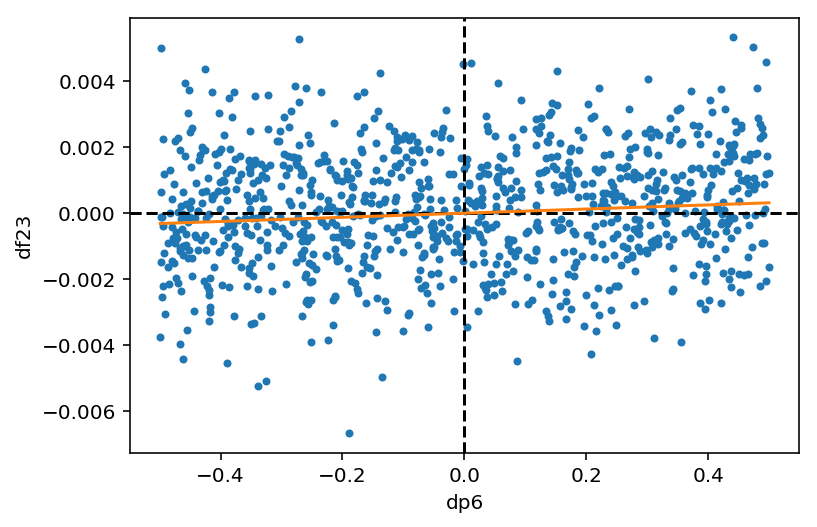

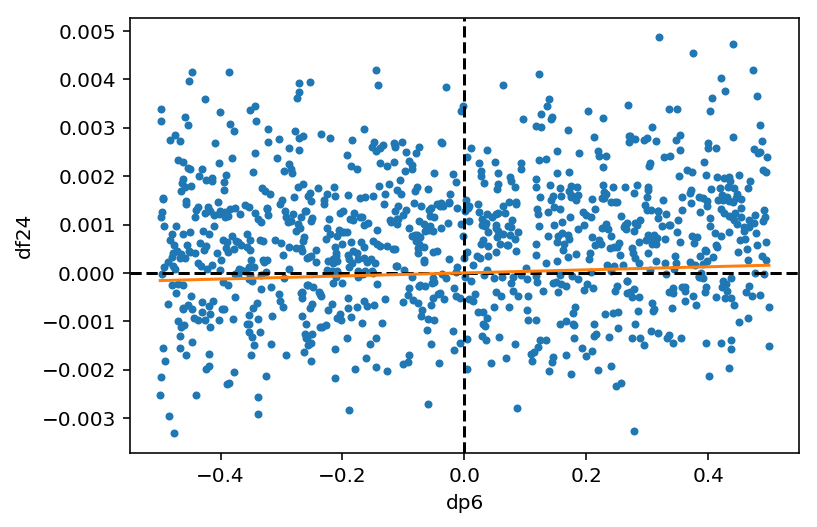

In [22]:
for i in range(7):
    for j in range(17,25):
        plt.figure()
        plot_dfdp(i,j)

In [17]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covar_tot),dfdp[j]))

In [18]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.07444261  0.07465375  0.06468706  0.47516808  0.06062761  0.3714572
  0.4538481 ]


In [21]:
func_zp[:,0]

array([ 0.0065721 ,  0.00657786,  0.00659808,  0.00657235,  0.00657331,
        0.0066279 ,  0.00657331,  0.00659603,  0.00657984,  0.0065936 ,
        0.00659667,  0.00659699,  0.00659174,  0.00660685,  0.00660474,
        0.00659693,  0.00659526,  0.00663437,  0.0066279 ,  0.00658266,
        0.00658112,  0.00657568,  0.00662323,  0.00658266,  0.0066039 ,
        0.00662298,  0.00660237,  0.00658214,  0.00662048,  0.00662118,
        0.00659008,  0.00660493,  0.00659834,  0.00659642,  0.00659962,
        0.00661107,  0.00660646,  0.0065824 ,  0.00657856,  0.00660813,
        0.00659642,  0.00657114,  0.00660205,  0.00659034,  0.00660058,
        0.00658502,  0.00657958,  0.00658042,  0.0065881 ,  0.0065936 ,
        0.00657805,  0.00659917,  0.00658854,  0.00661011,  0.00659859,
        0.00659795,  0.00661914,  0.00660192,  0.00661139,  0.00658477,
        0.00659686,  0.00659507,  0.0066    ,  0.00661254,  0.00657952,
        0.00659053,  0.00657626,  0.0065801 ,  0.00659533,  0.00

In [19]:
fmatrix

array([[  5.79080358e+03,  -5.68716215e+03,  -4.06057053e+03,
          8.86410682e+01,   5.55069971e+03,  -4.14157211e+01,
          3.83132027e+02],
       [ -5.68716215e+03,   7.76228536e+03,   4.50217749e+03,
          2.87557431e+02,  -5.43393065e+03,   3.95330269e+01,
         -5.80303627e+02],
       [ -4.06057053e+03,   4.50217749e+03,   9.66905636e+03,
         -1.03632913e+02,  -1.15210699e+04,  -3.99431463e+01,
         -4.37150052e+02],
       [  8.86410682e+01,   2.87557431e+02,  -1.03632913e+02,
          7.69465439e+01,   2.61121913e+02,  -5.42779005e+00,
         -2.76101172e+01],
       [  5.55069971e+03,  -5.43393065e+03,  -1.15210699e+04,
          2.61121913e+02,   1.45144716e+04,  -3.29474436e+00,
          5.38896673e+02],
       [ -4.14157211e+01,   3.95330269e+01,  -3.99431463e+01,
         -5.42779005e+00,  -3.29474436e+00,   1.57086752e+01,
         -6.59875459e+00],
       [  3.83132027e+02,  -5.80303627e+02,  -4.37150052e+02,
         -2.76101172e+01,   5.38

vpf: linear relation not strong, (halotools and my code give slightly different results and my code is slow)
Acen>1 needs to be cut off